# Predicting exoplanet radii
## Phase 1: Data preparation and visualisation

__Group 179__

- Geordie Elliot-Kerr (s3465651)
- Benjamin Grayland (s3927837)

## Table of contents
- [Introduction](#introduction)
  - [Dataset source](#dataset-source)
  - [Dataset details](#dataset-details)
  - [Dataset features](#dataset-features)
  - [Target feature](#target-feature)
- [Goals and objectives](#goals-and-objectives)
- [Related work](#related-work)
- [Data cleaning and preprocessing](#data-cleaning-and-preprocessing)
  - [Remove false positives](#remove-false-positives)
  - [Remove irrelevant features](#remove-irrelevant-features)
  - [Removing columns with no data](#removing-columns-with-no-data)
  - [Resolve missing values](#resolve-missing-values)
  - [Remove observations with high uncertainty](#remove-observations-with-high-uncertainty)
- [Data exploration and visualisation](#data-exploration-and-visualisation)
  - [Univariate visualisation](#univariate-visualisation)
    - [Histogram of planet radii](#histogram-of-planet-radii)
  - [Two-variable visualisation](#two-variable-visualisation)
  - [Three-variable visualisation](#three-variable-visualisation)
- [Summary and conclusion](#summary-and-conclusion)
- [References](#references)

## Introduction<a id='introduction'></a>

### Dataset source<a id='dataset-source'></a>
The _KOI (Kepler Object of Interest) Cumulative List_ dataset used in this study was sourced from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/data.html). It contains  stellar observations made by the Kepler telescope.

#### Attribution
This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program.

### Dataset details<a id='dataset-details'></a>
The dataset contains information on 9564 _objects of interest_, stars that are suspected of hosting exoplanets. These stars exhibit periodic dimming - dimming that is potentially caused by a planet passing directly between the star and the Kepler space telescope.

The dataset includes confirmed exoplanets as well as candidate and false positive observations.

__ADD MORE ONCE WE HAVE SETTLED ON THE FEATURES__

In [89]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)  # TO BE TURNED OFF

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [90]:
df = pd.read_csv('exoplanets_data.csv', sep = ',')
df.sample(10, random_state=999)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
6362,6363,4914399,K05100.01,NaN,FALSE POSITIVE,Done,16/08/2018,FALSE POSITIVE,0.000,0,0,0,1,q1_q17_dr25_sup_koi,CENT_NOFITS---EPHEM_MATCH,1.237086,0.000047,-0.000047,132.723500,0.04890,-0.04890,2454965.723,0.04890,-0.04890,0.0,NaN,NaN,NaN,NaN,NaN,1.222,0.5400,-0.1730,5.7430,0.1550,-0.1550,NaN,NaN,NaN,804.0,17.8,-17.8,0.251106,0.649000,-0.019000,0.02772,0.04804,-0.00871,LS+MCMC,36.31,10.00,-7.33,0.0234,NaN,NaN,20.97,NaN,NaN,2174.0,NaN,NaN,5293.07,4346.26,-2412.76,1.309,0.567,-0.567,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.3105,0.2893,q1_q17_dr25_koi,6.651999,19.138454,55.3,1,145.0,1.0,q1_q17_dr25_tce,1.100000e+18,-1.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,004/004914/004914399/dv/kplr004914399-20160209...,004/004914/004914399/dv/kplr004914399-001-2016...,6556.0,185.0,-254.0,4.243,0.170,-0.187,-0.36,0.25,-0.30,1.324,0.366,-0.267,1.121,0.178,-0.162,NaN,NaN,NaN,q1_q17_dr25_stellar,288.97766,40.010529,14.462,14.798,14.418,14.319,14.268,13.405,13.165,13.080,0.013,19.265157,3.900000e-06,40.010626,4.200000e-05,-0.8200,0.1600,0.3500,0.1500,0.000220,0.000140,-0.000080,0.000130,-1.250,0.270,0.170,0.250,1.270,0.270,-1.290,0.140,0.340,0.980,1.330,0.380
5956,5957,10152836,K03952.01,NaN,FALSE POSITIVE,Done,16/08/2018,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_SEC_DV---MOD_SEC_ALT---HAS_SEC_TCE,220.929012,0.000509,-0.000509,240.819270,0.00185,-0.00185,2455073.819,0.00185,-0.00185,0.0,NaN,NaN,NaN,NaN,NaN,0.826,0.0020,-0.6090,7.3350,0.2180,-0.2180,NaN,NaN,NaN,2460.0,39.1,-39.1,0.051019,0.000326,-0.005380,1.29665,4.14542,-0.51316,LS+MCMC,5.24,1.61,-0.64,0.7114,NaN,NaN,89.68,NaN,NaN,299.0,NaN,NaN,1.89,1.69,-0.60,149.600,68.300,-68.300,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2889,0.3511,q1_q17_dr25_koi,646.660700,919.624500,70.4,1,3.0,1.0,q1_q17_dr25_tce,1.111110e+31,0.2108,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010152/010152836/dv/kplr010152836-20160209...,010/010152/010152836/dv/kplr010152836-001-2016...,5893.0,159.0,-176.0,4.483,0.065,-0.208,-0.12,0.30,-0.30,0.941,0.288,-0.115,0.981,0.120,-0.120,NaN,NaN,NaN,q1_q17_dr25_stellar,296.03668,47.18011

### Dataset features<a id='dataset-features'></a>

### Target feature<a id='target-feature'></a>
The target feature is exoplanet radius - which will be predicted based on the other stellar observation data. This is column __koi_prad__ in the dataset and is shown relative to Earth - e.g. a value of 2.0 indicates a planet with a radius twice that of Earth.

## Goals and objectives<a id='goals-and-objectives'></a>
"An exoplanet's girth and heft are calculated from its star's wink and wobble too." - https://www.abc.net.au/news/science/2022-01-11/exoplanet-size-mass-composition-atmosphere-life-astrophysics/100696122

## Related work<a id='related-work'></a>
Observing transits provides some of the necessary information for determining the radius and mass of a planet, however the light curve alone only provides the planet-to-star radius ratio, not the actual radius (or mass). (Winn, 2010). For this, the radial velocity is also required.

A radial velocity technique was used to identify the first exoplanets (http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography_files/Radial_Velocity.pdf) starting with an object orbiting the triple star system HD 114762 (Latham et al. 1989: Latham, D. W., Stefanik, R. P., Mazeh, T., et al. (1989) The unseen companion of HD114762 - A probable brown dwarf. Nature, 339, 38-40.), later confirmed as a small red-dwarf star rather than an exoplanet. The first exoplanets were confirmed 

- Transit photometry (transit method), doppler spectroscopy (radial velocity), now microlensing (gravitational)
- Observational bias favouring planets near the star.

## Data cleaning and preprocessing<a id='data-cleaning-and-preprocessing'></a>
The following steps were taken to prepare the data for this project.

In [91]:
# use kepid as index column
df = df.set_index('kepid')

In [92]:
# move target column to the end
new_cols = [col for col in df.columns if col != 'koi_prad'] + ['koi_prad']
df = df[new_cols]

### Remove false positives<a id='remove-false-positives'></a>
The dataset is the complete list of observations and includes 4839 observations that were later deemed not to be exoplanets. We will remove these.

In [93]:
df = df[df['koi_disposition'] != 'FALSE POSITIVE']
df = df.drop('koi_disposition', axis = 1)
df.shape

(4725, 139)

### Remove irrelevant features<a id='remove-irrelevant-features'></a>
The full dataset contains a large number of columns, many of which are not relevant to radius prediction.

The following columns will be dropped from the dataset, as we do not believe them to be explanatory variables. Detailed descriptions of all the columns are available [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

| Column | Comment |
| :-- | :-- |
| kepoi_name | ID number |
| kepler_name | ID name |
| koi_vet_stat | Vetting status - we will use koi_disposition to exclude false positives |
| koi_vet_date | Date this record was last updated |
| koi_pdisposition | Classification metadata |
| koi_score | Classification metadata |
| koi_fpflag_nt | Classification metadata |
| koi_fpflag_ss | Classification metadata |
| koi_fpflag_co | Classification metadata |
| koi_fpflag_ec | Classification metadata |
| koi_disp_prov | Classification metadata |
| koi_comment | Classification metadata |
| koi_time0bk | First observation timestamp |
| koi_time0 | First observation timestamp |
| koi_ror | Ratio of planet radius to stellar radius, derived value |
| koi_fittype | Model used to fit planetary parameters |
| koi_parm_prov | Source of parameters |
| koi_tce_plnt_num | Planet reference number |
| koi_tce_delivname | Planet reference name |
| koi_quarters | Indicates which part of the data was searched |
| koi_trans_mod | Model used to fit transit data |
| koi_model_dof | Degrees of freedom used for the transit data fit |
| koi_model_chisq | Goodness of the model fit |
| koi_datalink_dvr | Link to the full report on this KOI (NB: several hundred pages)
| koi_datalink_dvs | Link to the summary report on this KOI |
| koi_sparprov | Source of stellar parameters |
| ra | Right ascension of star (parameters from the Kepler Input Catalog) |
| dec | Declination of star (KIC parameter) |
| koi_kepmag | Kepler-band (mag) (KIC parameter) |
| koi_gmag | KIC g'-band mag (KIC parameter) |
| koi_rmag | KIC r'-band mag (KIC parameter) |
| koi_imag | KIC i'-band mag (KIC parameter) |
| koi_zmag | KIC z'-band mag (KIC parameter) |
| koi_jmag | KIC J'-band mag (KIC parameter) |
| koi_hmag | KIC H'-band mag (KIC parameter) |
| koi_kmag | KIC K'-band mag (KIC parameter) |
| koi_fwm_sra | Vetting statistics - we will remove false positives |
| koi_fwm_sdec | Vetting statistics - we will remove false positives |
| koi_fwm_srao | Vetting statistics - we will remove false positives |
| koi_fwm_sdeco | Vetting statistics - we will remove false positives |
| koi_fwm_prao | Vetting statistics - we will remove false positives |
| koi_fwm_pdeco | Vetting statistics - we will remove false positives |
| koi_fwm_stat_sig | Vetting statistics - we will remove false positives |
| koi_dicco_mra | Vetting statistics - we will remove false positives |
| koi_dicco_mdec | Vetting statistics - we will remove false positives |
| koi_dicco_msky | Vetting statistics - we will remove false positives |
| koi_dikco_mra | Vetting statistics - we will remove false positives |
| koi_dikco_mdec | Vetting statistics - we will remove false positives |
| koi_dikco_msky | Vetting statistics - we will remove false positives 

* We will also drop columns specifying uncertainty ranges for any of these columns.


In [94]:
irrelevant_features = [
    'rowid',
    'kepoi_name', 'kepler_name', 'koi_vet_stat', 'koi_vet_date',
    'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
    'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment',
    'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2',
    'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_ror',
    'koi_ror_err1', 'koi_ror_err2','koi_fittype',
    'koi_parm_prov', 'koi_tce_plnt_num', 'koi_tce_delivname',
    'koi_quarters', 'koi_trans_mod', 'koi_model_dof',
    'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs',
    'koi_sparprov', 'ra', 'dec', 'koi_kepmag', 'koi_gmag',
    'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag',
    'koi_kmag', 'koi_fwm_sra', 'koi_fwm_sdec', 'koi_fwm_srao',
    'koi_fwm_sdeco', 'koi_fwm_prao', 'koi_fwm_pdeco',
    'koi_fwm_stat_sig', 'koi_dicco_mra', 'koi_dicco_mdec',
    'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec',
    'koi_dikco_msky', 'koi_fwm_sra_err', 'koi_fwm_sdec_err',
    'koi_fwm_srao_err', 'koi_fwm_sdeco_err', 'koi_fwm_prao_err',
    'koi_fwm_pdeco_err', 'koi_dicco_mra_err', 'koi_dicco_mdec_err',
    'koi_dicco_msky_err', 'koi_dikco_mra_err', 'koi_dikco_mdec_err',
    'koi_dikco_msky_err', 'koi_limbdark_mod'
]

df = df.drop(irrelevant_features, axis=1)
df.shape

(4725, 70)

### Removing columns with no data<a id='removing-columns-with-no-data'></a>
In addition to the above, there are a number of columns that do not contain any data - these can be removed.

In [95]:
print(*list(df.columns[df.isnull().all(0)]), sep='\n')

koi_eccen_err1
koi_eccen_err2
koi_longp
koi_longp_err1
koi_longp_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_sma_err1
koi_sma_err2
koi_incl_err1
koi_incl_err2
koi_teq_err1
koi_teq_err2
koi_sage
koi_sage_err1
koi_sage_err2


In [96]:
df = df.dropna(axis=1, how='all')

In addition, the __koi_eccen__, __koi_ldm_coeff3__ and __koi_ldm_coeff4__ columns contain all zero measurements, so these can be dropped too.

In [97]:
df = df.drop(['koi_eccen', 'koi_ldm_coeff3' ,'koi_ldm_coeff4'], axis = 1)
df.shape

(4725, 50)

### Resolve missing values<a id='resolve-missing-values'></a>
Many of the observations are still missing values - we will simply drop these rows.

In [98]:
df.isnull().sum()

koi_period             0
koi_period_err1      121
koi_period_err2      121
koi_impact           106
koi_impact_err1      121
koi_impact_err2      121
koi_duration           0
koi_duration_err1    121
koi_duration_err2    121
koi_depth            106
koi_depth_err1       121
koi_depth_err2       121
koi_srho             103
koi_srho_err1        103
koi_srho_err2        103
koi_prad_err1        106
koi_prad_err2        106
koi_sma              106
koi_incl             106
koi_teq              106
koi_insol            103
koi_insol_err1       103
koi_insol_err2       103
koi_dor              106
koi_dor_err1         121
koi_dor_err2         121
koi_ldm_coeff2       106
koi_ldm_coeff1       106
koi_max_sngle_ev     473
koi_max_mult_ev      473
koi_model_snr        106
koi_count              0
koi_num_transits     473
koi_bin_oedp_sig     617
koi_steff            106
koi_steff_err1       112
koi_steff_err2       125
koi_slogg            106
koi_slogg_err1       112
koi_slogg_err2       112


In [99]:
df = df.dropna()
df.shape

(4067, 50)

### Remove observations with high uncertainty<a id='remove-observations-with-high-uncertainty'></a>
The dataset provides uncertainties for most of the measurements. We will remove any rows that feature any measurements with a high degree of uncertainty. We are unsure if this will introduce any bias into the sample. __GEORDIE: question for your astrophysicist friend.__

In [100]:
# We will exclude observations with uncertainty greater than +/- 15%.
allowed_uncertainty = 0.15

In [101]:
columns_to_drop_due_to_high_uncertainty = ['koi_srho', 'koi_srho_err1', 'koi_srho_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2']

In [102]:
df = df.drop(columns_to_drop_due_to_high_uncertainty, axis = 1)

In [103]:
columns_with_error_range = [c.removesuffix('_err1') for c in list(df) if c.endswith('_err1')]

In [104]:
uncertainty_cols = []

for col in columns_with_error_range:
    col_err1 = col + '_err1'
    col_err2 = col + '_err2'
    col_err1_pc = col + '_err1_pc'
    col_err2_pc = col + '_err2_pc'
    uncertainty_cols.append(col_err1)
    uncertainty_cols.append(col_err2)
    df[col_err1_pc] = df[col_err1].abs() / df[col].abs()
    df[col_err2_pc] = df[col_err2].abs() / df[col].abs()

df.replace([np.inf, -np.inf], np.nan, inplace=True)

columns_with_error_pc = [c for c in list(df) if c.endswith('_pc')]

# <15% uncertainty OR no uncertainty specified.
dfiltered = df[((df[columns_with_error_pc] < allowed_uncertainty) | (df[columns_with_error_pc].isna()) ).all(axis=1)]

dfiltered.shape

(508, 56)

In [105]:
df[columns_with_error_pc].gt(allowed_uncertainty).sum()

koi_period_err1_pc         0
koi_period_err2_pc         0
koi_duration_err1_pc     183
koi_duration_err2_pc     183
koi_depth_err1_pc        126
koi_depth_err2_pc        126
koi_prad_err1_pc        2346
koi_prad_err2_pc        1049
koi_dor_err1_pc         2825
koi_dor_err2_pc         2825
koi_steff_err1_pc          2
koi_steff_err2_pc          0
koi_slogg_err1_pc         46
koi_slogg_err2_pc          2
koi_srad_err1_pc        2341
koi_srad_err2_pc        1045
koi_smass_err1_pc        261
koi_smass_err2_pc        274
dtype: int64

In [106]:
df = df.drop(columns_with_error_pc, axis = 1)
df = df.drop(uncertainty_cols, axis = 1)

dfiltered = dfiltered.drop(columns_with_error_pc, axis = 1)
dfiltered = dfiltered.drop(uncertainty_cols, axis = 1)

In [107]:
# Final column list
print(*list(dfiltered.columns), sep='\n')
dfiltered.shape

koi_period
koi_duration
koi_depth
koi_sma
koi_incl
koi_teq
koi_dor
koi_ldm_coeff2
koi_ldm_coeff1
koi_max_sngle_ev
koi_max_mult_ev
koi_model_snr
koi_count
koi_num_transits
koi_bin_oedp_sig
koi_steff
koi_slogg
koi_srad
koi_smass
koi_prad


(508, 20)

## Data exploration and visualisation<a id='data-exploration-and-visualisation'></a>

### Univariate visualisation<a id='univariate-visualisation'></a>

#### Histogram of planet radii<a id='histogram-of-planet-radii'></a>
The majority of objects in the dataset have radii between 0 and 4 times that of Earth, but there are some that are significantly larger. In order to better visualise the distribution, we will plot the natural log of the radii.

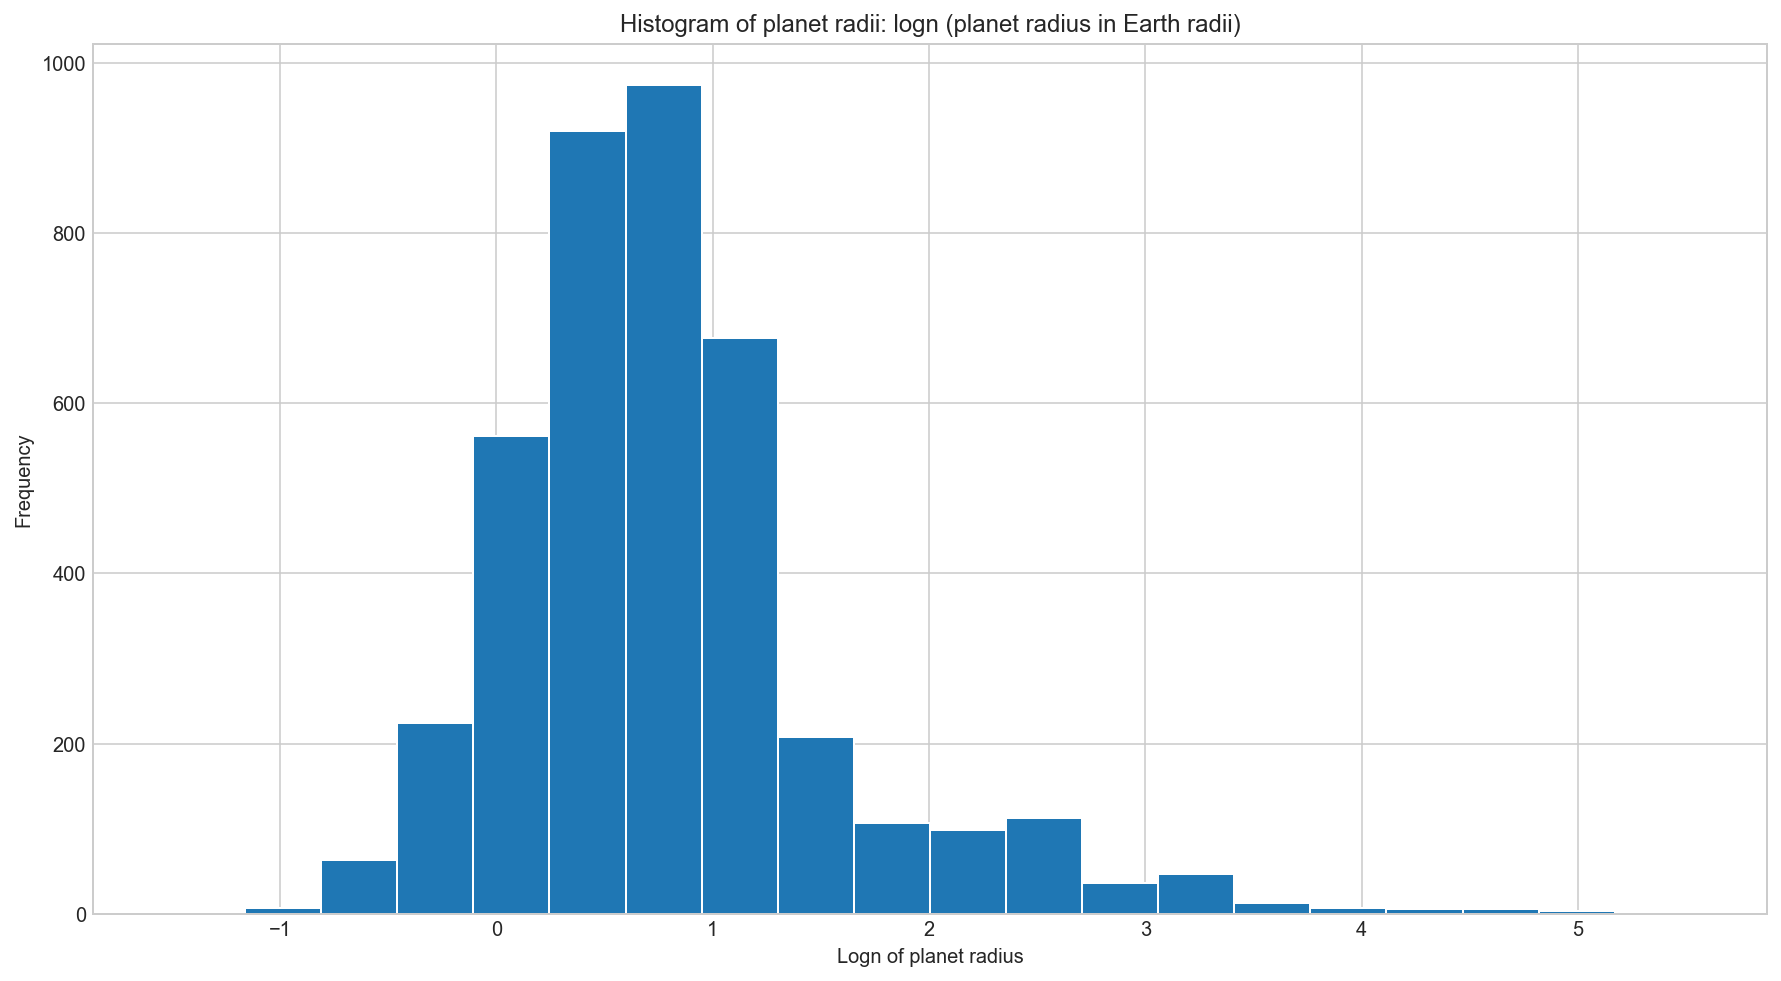

In [108]:
plt.figure(figsize = (15,8))
plt.hist(np.log(df['koi_prad']), bins=20)
plt.title('Histogram of planet radii: logn (planet radius in Earth radii)')
plt.xlabel("Logn of planet radius")
plt.ylabel("Frequency")
plt.show()

### Two-variable visualisation<a id='two-variable-visualisation'></a>

#### Scatterplot of planet radius and stellar radius

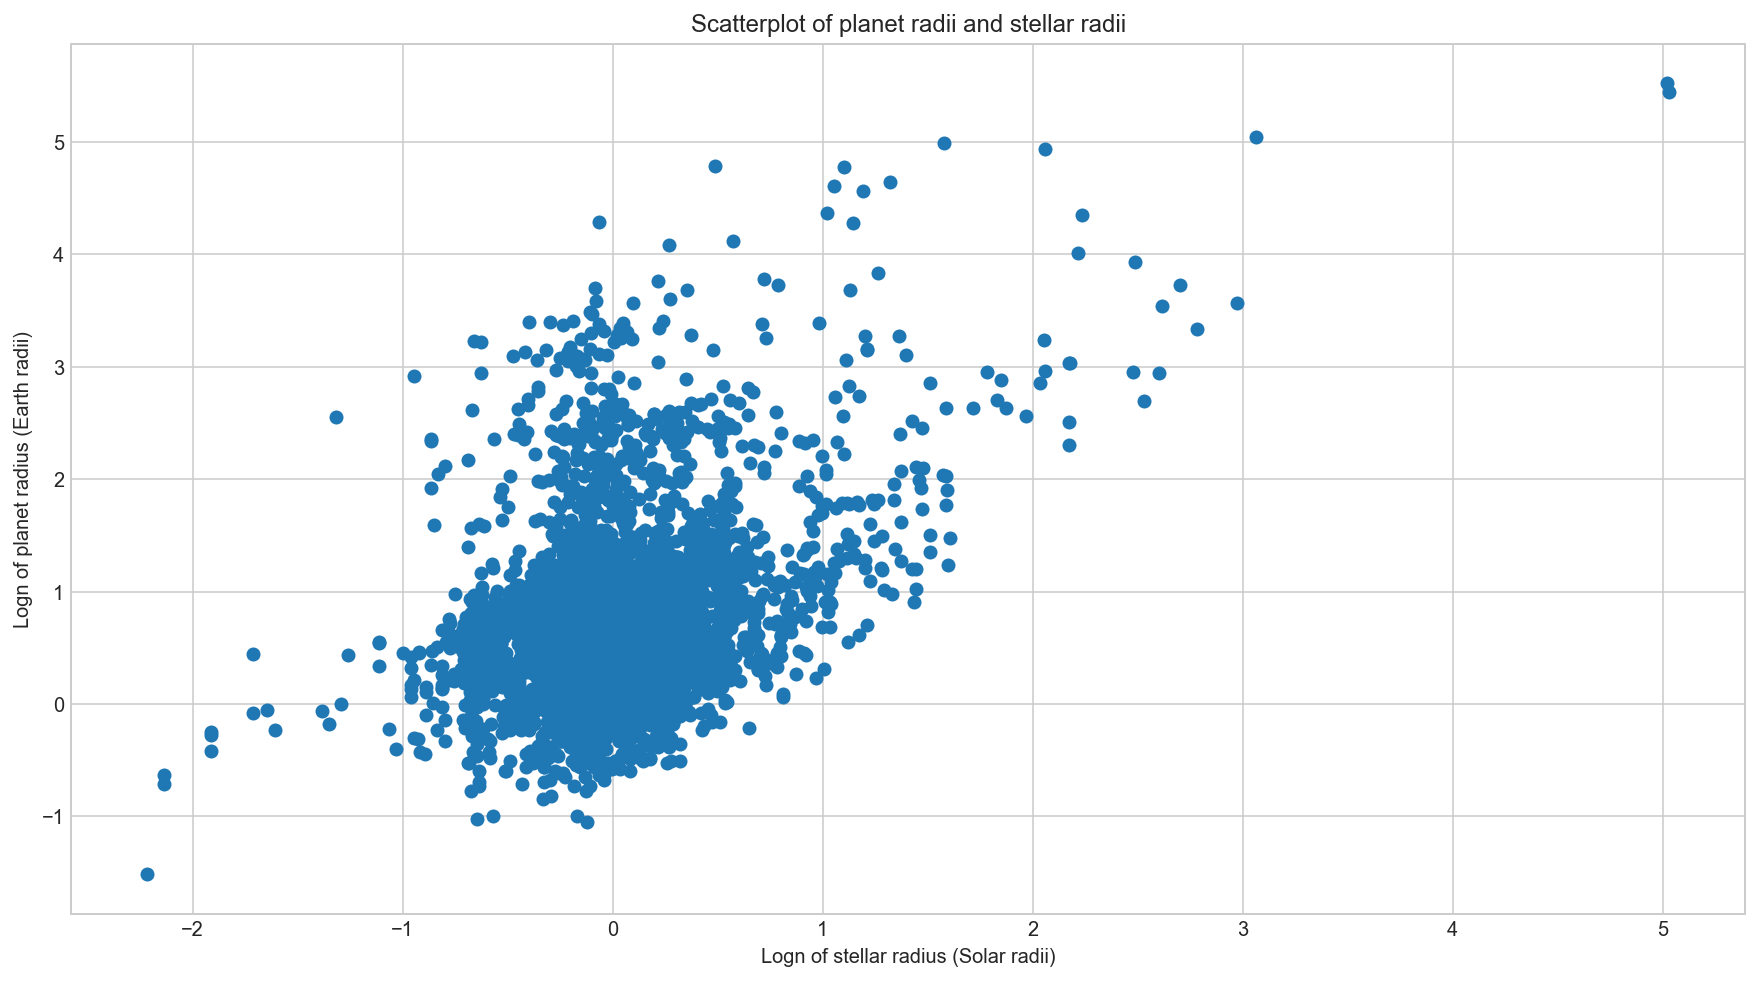

In [109]:
plt.figure(figsize = (15,8))
plt.scatter(np.log(df['koi_srad']), np.log(df['koi_prad']))
plt.title('Scatterplot of planet radii and stellar radii')
plt.xlabel("Logn of stellar radius (Solar radii)")
plt.ylabel("Logn of planet radius (Earth radii)")
plt.show()

#### Scatterplot of stellar radius and stellar mass

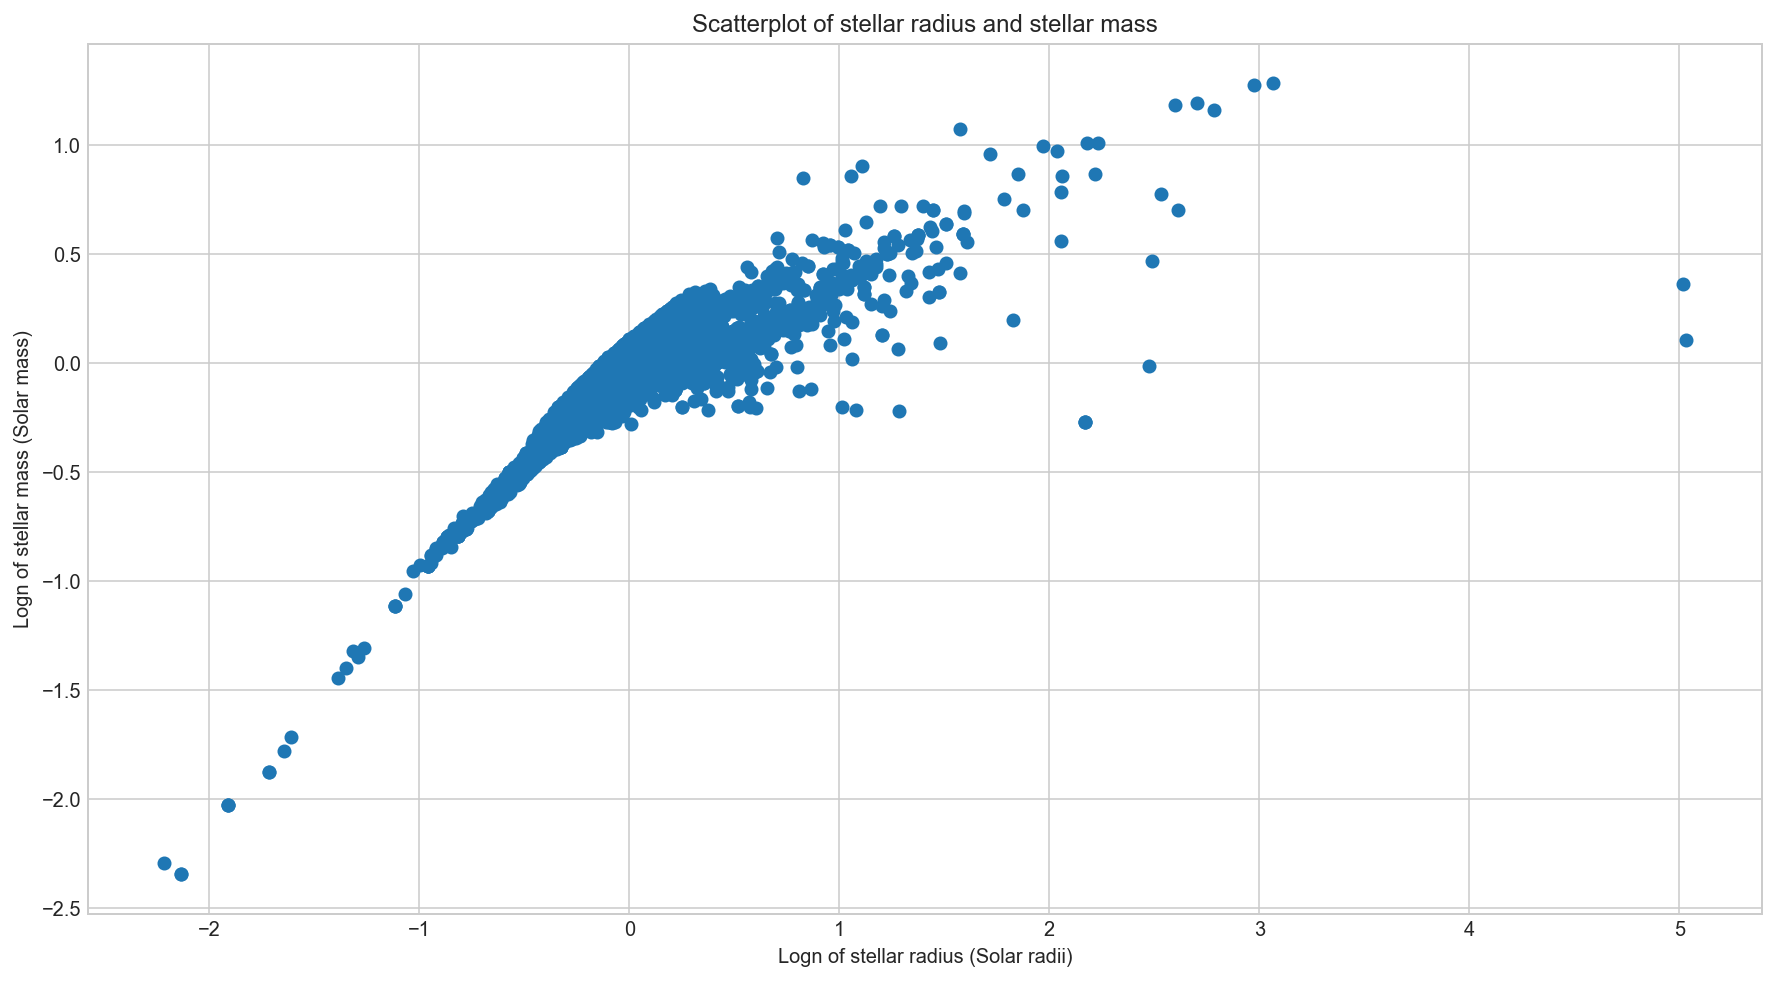

In [110]:
plt.figure(figsize = (15,8))
plt.scatter(np.log(df['koi_srad']), np.log(df['koi_smass']))
plt.title('Scatterplot of stellar radius and stellar mass')
plt.xlabel("Logn of stellar radius (Solar radii)")
plt.ylabel("Logn of stellar mass (Solar mass)")
plt.show()

### Three-variable visualisation<a id='three-variable-visualisation'></a>

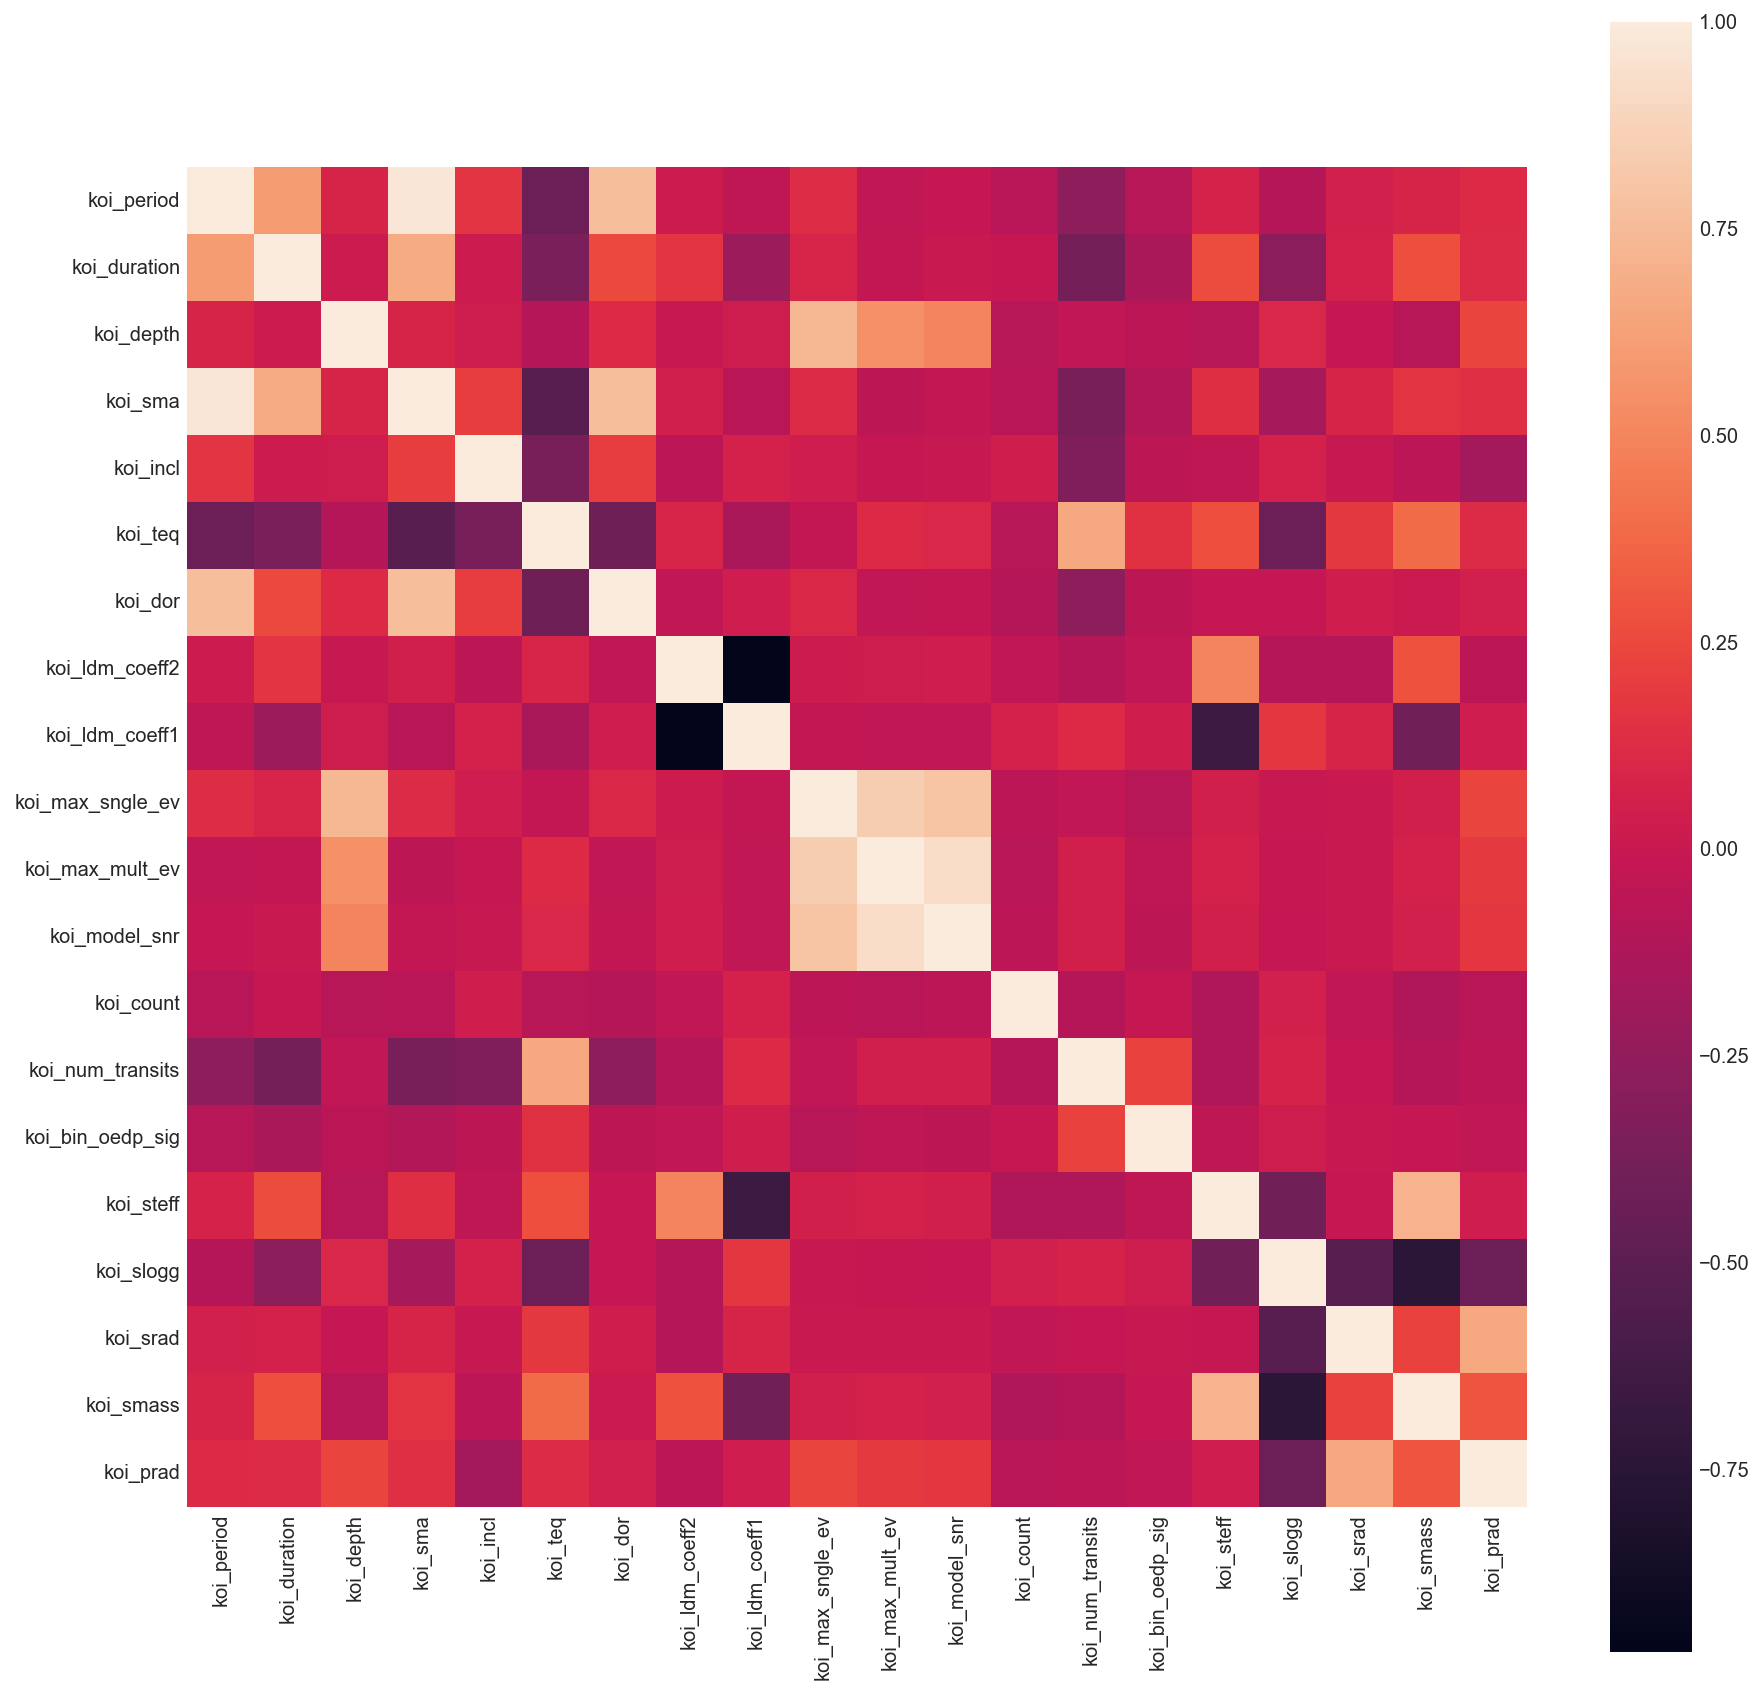

In [111]:
plt.figure(figsize = (15,15))
df_c = df[list(df.columns)] #Subsetting the data
cor = df_c.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map
plt.show()

In [112]:
from mpl_toolkits import mplot3d
%matplotlib notebook
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = np.log(df['koi_srad'])
xdata = np.log(df['koi_smass'])
ydata = np.log(df['koi_prad'])

plt.title('Scatterplot of stellar radius, stellar mass and planet radius')
plt.xlabel('Logn of stellar radius (Solar radii)')
plt.ylabel('Logn of stellar mass (Solar mass)')
ax.set_zlabel('Logn of planet radius (Earth radii)')

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='cool');

plt.show()

<IPython.core.display.Javascript object>

### Scatterplot of time between planetary transits and planet radius
Plot shows little association between planetary transits and planet radius, TODO: THIS COULD BE A FEW THINGS

In [120]:
plt.figure(figsize = (15,8))
plt.scatter(np.log(df['koi_period']), np.log(df['koi_prad']))
plt.title('Scatterplot of time between planetary transits and planet radius')
plt.xlabel("Logn of time between consecutive planetary transits")
plt.ylabel("Logn of planet radius")
plt.show()

<IPython.core.display.Javascript object>

asdsd

In [121]:
plt.figure(figsize = (15,8))
plt.scatter(np.log(df['koi_depth']), np.log(df['koi_prad']))
plt.title('Scatterplot of depth of transit and planet radius')
plt.xlabel("Logn of the fraction of stellar flux lost at the minimum of the planetary transit.")
plt.ylabel("Logn of planet radius")
plt.show()

<IPython.core.display.Javascript object>

## Summary and conclusion<a id='summary-and-conclusion'></a>

radius surface gravity

In [125]:
plt.figure(figsize = (15,8))
plt.scatter((df[df['koi_prad'] < 4]['koi_prad']), np.log(df[df['koi_prad'] < 4]['koi_slogg']))
plt.title('Scatterplot of planet radius to surface gravity')
plt.xlabel("Logn of planet radius")
plt.ylabel("Logn of surface grav")
plt.show()

<IPython.core.display.Javascript object>

radius and orbit eccentricity

In [116]:
plt.figure(figsize = (15,8))
plt.boxplot(x=[np.log(df['koi_prad']), np.log(df['koi_srad'])])
plt.xticks([1,2],['planet radius (logn)', 'star radius (logn)'])
plt.show()

<IPython.core.display.Javascript object>

## 5 Number Summary

In [117]:
bigger_than_earth = df[df['koi_prad'] > 1]
no_bte = bigger_than_earth.shape[0]
smaller_than_earth = df[df['koi_prad'] < 1]
no_ste = smaller_than_earth.shape[0]

bigger_than_sun = df[df['koi_srad'] > 1]
no_bts = bigger_than_sun.shape[0]
smaller_than_sun = df[df['koi_srad'] < 1]
no_sts = smaller_than_sun.shape[0]
print(f'{round((no_bte / df.shape[0]) * 100, 2)}% of planets are bigger than earth and {round((no_bts / df.shape[0]) * 100, 2)}% of stars in the dataset are bigger than our sun')
print(f'{round((no_ste / df.shape[0]) * 100, 2)}% of planets are smaller than earth and {round((no_sts / df.shape[0]) * 100, 2)}% of stars in the dataset are smaller than our sun')

#Number of planets bigger than earth that also have a bigger star
no_bps = bigger_than_earth[bigger_than_earth['koi_srad'] > 1].shape[0]
print(f"{round((no_bps / df.shape[0]) * 100, 2)}% of the planets bigger than earth have a star bigger than earth's")
#Number of planets smaller than earth that also have a smaller star
no_sps = smaller_than_earth[smaller_than_earth['koi_srad'] < 1].shape[0]
print(f"{round((no_sps / df.shape[0]) * 100, 2)}% of the planets smaller than earth have a star smaller than earth's")

89.11% of planets are bigger than earth and 46.2% of stars in the dataset are bigger than our sun
10.47% of planets are smaller than earth and 53.63% of stars in the dataset are smaller than our sun
42.64% of the planets bigger than earth have a star bigger than earth's
7.03% of the planets smaller than earth have a star smaller than earth's


Difference between stellar radius and planet radius

In [118]:
df['koi_rdiff'] = df['koi_prad'] - df['koi_srad']
df['koi_rdiff'] # Difference between stellar radius and planet radius (neg values means star is larger)

kepid
10797460     1.333
10797460     1.903
10811496    13.732
10854555     1.704
10872983     2.928
             ...  
9938836     -0.559
10011213     2.305
10028127     2.865
10128825    -0.311
10155286    11.476
Name: koi_rdiff, Length: 4067, dtype: float64

Surface temp and radius difference

In [119]:
plt.figure(figsize = (15,8))
plt.scatter(np.log(df['koi_rdiff']), np.log(df['koi_teq']))
plt.title('Scatterplot of planet vs star radius to surface temp')
plt.xlabel("Logn of difference between planet and star radius")
plt.ylabel("Logn of surface temp")
plt.show()

<IPython.core.display.Javascript object>

## References<a id='references'></a>
- NASA Exoplanet Archive. KOI Table (cumulative). Retrieved September 27, 2022 from https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative
- Paul Anthony Wilson. (2016). The exoplanet transit method. https://www.paulanthonywilson.com/exoplanets/exoplanet-detection-techniques/the-exoplanet-transit-method/
- Winn, J.N. (2010). Exoplanet Transits and Occultations. In S. Seager (Ed.), Exoplanets (1st ed., pp. 55-78). University of Arizona Press. https://arxiv.org/abs/1001.2010

kepid
10797460    89.66
10797460    89.57
10811496    88.96
10854555    85.41
10872983    88.11
            ...  
9938836     83.72
10011213    89.91
10028127    89.85
10128825    89.42
10155286    89.98
Name: koi_incl, Length: 4067, dtype: float64

kepid
10797460     24.810
10797460     77.900
10811496     53.500
10854555      8.750
10872983     16.360
             ...   
9938836       7.140
10011213    202.500
10028127    342.000
10128825      4.331
10155286    796.000
Name: koi_dor, Length: 4067, dtype: float64